# 10. Gaussian Kernel Regression

(Based on https://towardsdatascience.com/kernel-regression-from-scratch-in-python-ea0615b23918)

In this example, we apply Gaussian kernel regression to a one-dimensional dataset.

## Gaussian Kernel

In Gaussian kernel regression the shape of the kernel is the Gaussian curve:
$$
\frac{1}{\sqrt{2\pi}} \exp \left ( - \frac{z^2}{2} \right ).
$$

Each constructed kernel describes a normal distribution with mean value ${\bf x}_i$ and standard deviation $b$, where $b$ is a hyperparameter that controls the width of the Gaussian:
$$
k(x, x_i) = \frac{1}{\sqrt{2\pi}} \exp \left ( - \frac{(x-x_i)^2}{2b^2} \right ).
$$

Note that the normalization of the Gaussian does not matter as the weights are being normalized themselves.

## Prediction

The weights for a given new input $\tilde x$ are calculated from the normalized kernel values:
$$
w_i = \frac{k(\tilde x, x_i)}{\sum_{l=1}^N k(x_l, x_i)}.
$$

The prediction $\tilde y$ is obtained by multiplying the weight vector ${\bf w} = [w_1, w_2, \dots, w_N]$ with the label vector ${\bf y} = [y_1, y_2, \dots, y_N]$:
$$
\tilde y = \sum_{i=1}^N w_i y_i.
$$

In [1]:
from scipy.stats import norm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

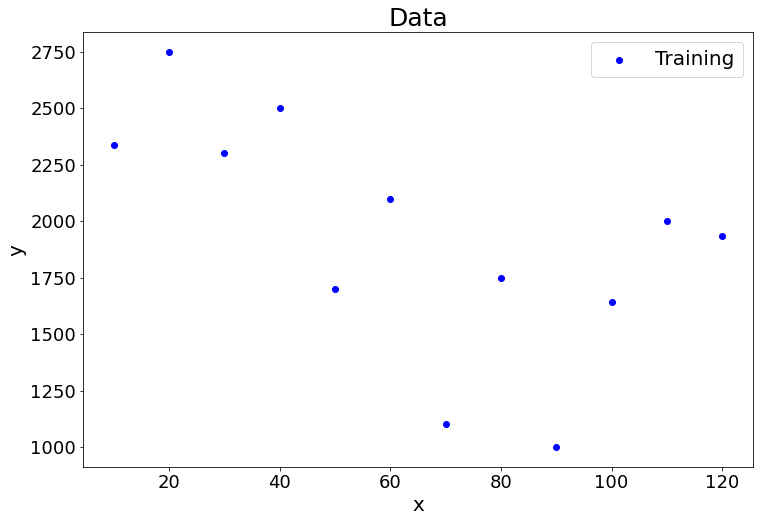

In [2]:
# Create a 1D dataset
X = np.array([10,20,30,40,50,60,70,80,90,100,110,120])
Y = np.array([2337,2750,2301,2500,1700,2100,1100,1750,1000,1642, 2000,1932])

# Plot the dataset
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(X, Y, color='blue', label='Training')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Data',fontsize=25)
plt.legend(fontsize=20)
plt.show()

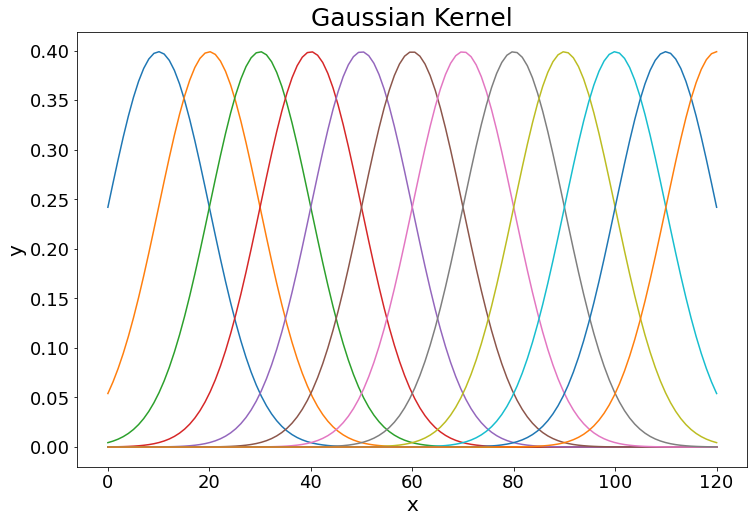

In [30]:
# Set the width of the Gaussian kernel
b = 10

def gaussian_kernel(z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)

# Plot the kernels for the dataset
fig,ax = plt.subplots(figsize=(12,8))
xlist = np.linspace(0, 120, 120)

for x in X:
    ylist = gaussian_kernel((x-xlist)/b)
    ax.plot(xlist, ylist)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Gaussian Kernel',fontsize=25)
plt.show()

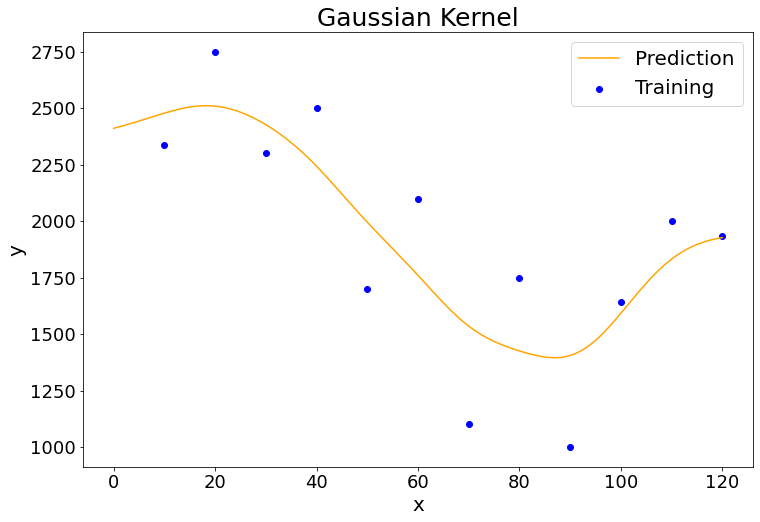

In [31]:
class GKR:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    # Implement the Gaussian Kernel
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)
    
    # Calculate weights and return prediction
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [kernel/np.sum(kernels) for kernel in kernels]
        return np.dot(weights, self.y)
    
gkr = GKR(X, Y, b)

fig,ax = plt.subplots(figsize=(12,8))
xlist = np.linspace(0, 120, 240)
ylist = np.array([])

for x in xlist:
    ylist = np.append(ylist, gkr.predict(x))

ax.scatter(X, Y, color='blue', label='Training')
ax.plot(xlist, ylist, color='orange', label='Prediction')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(fontsize=20)
ax.set_title('Gaussian Kernel',fontsize=25)
plt.show()